In [2]:
#importing the libraries 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

In [4]:
data=pd.read_csv("/kaggle/input/ipl-dataset-2008-to-2025/ball_by_ball_data.csv")
print(data)

        season_id  match_id        batter          bowler   non_striker  \
0            2008    335982    SC Ganguly         P Kumar   BB McCullum   
1            2008    335982   BB McCullum         P Kumar    SC Ganguly   
2            2008    335982   BB McCullum         P Kumar    SC Ganguly   
3            2008    335982   BB McCullum         P Kumar    SC Ganguly   
4            2008    335982   BB McCullum         P Kumar    SC Ganguly   
...           ...       ...           ...             ...           ...   
278200       2025   1485779      T Stubbs  Arshdeep Singh  Sameer Rizvi   
278201       2025   1485779  Sameer Rizvi      MP Stoinis      T Stubbs   
278202       2025   1485779  Sameer Rizvi      MP Stoinis      T Stubbs   
278203       2025   1485779      T Stubbs      MP Stoinis  Sameer Rizvi   
278204       2025   1485779  Sameer Rizvi      MP Stoinis      T Stubbs   

        team_batting  team_bowling  over_number  ball_number  batter_runs  \
0                  6  

In [5]:
#head
print("\nhead(first few rows) of the dataset:\n")
print(data.head())


head(first few rows) of the dataset:

   season_id  match_id       batter   bowler  non_striker  team_batting  \
0       2008    335982   SC Ganguly  P Kumar  BB McCullum             6   
1       2008    335982  BB McCullum  P Kumar   SC Ganguly             6   
2       2008    335982  BB McCullum  P Kumar   SC Ganguly             6   
3       2008    335982  BB McCullum  P Kumar   SC Ganguly             6   
4       2008    335982  BB McCullum  P Kumar   SC Ganguly             6   

   team_bowling  over_number  ball_number  batter_runs  ...  is_bye  \
0             1            0            0            0  ...   False   
1             1            0            1            0  ...   False   
2             1            0            2            0  ...   False   
3             1            0            3            0  ...   False   
4             1            0            4            0  ...   False   

   is_penalty wide_ball_runs no_ball_runs leg_bye_runs bye_runs  penalty_runs  \
0 

In [6]:
print("\n\ntail(last few rows) of the dataset:\n")
print(data.tail())



tail(last few rows) of the dataset:

        season_id  match_id        batter          bowler   non_striker  \
278200       2025   1485779      T Stubbs  Arshdeep Singh  Sameer Rizvi   
278201       2025   1485779  Sameer Rizvi      MP Stoinis      T Stubbs   
278202       2025   1485779  Sameer Rizvi      MP Stoinis      T Stubbs   
278203       2025   1485779      T Stubbs      MP Stoinis  Sameer Rizvi   
278204       2025   1485779  Sameer Rizvi      MP Stoinis      T Stubbs   

        team_batting  team_bowling  over_number  ball_number  batter_runs  \
278200           252           494           18            5            4   
278201           252           494           19            0            0   
278202           252           494           19            1            1   
278203           252           494           19            2            1   
278204           252           494           19            3            6   

        ...  is_bye  is_penalty wide_ball_runs 

In [7]:
# display the dimensions, head, and tail of the dataset
row_count, col_count = data.shape
print(f"number of rows:{row_count}\nNumber of coloumns: {col_count}")

number of rows:278205
Number of coloumns: 30


In [8]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278205 entries, 0 to 278204
Data columns (total 30 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   season_id          278205 non-null  int64 
 1   match_id           278205 non-null  int64 
 2   batter             278205 non-null  object
 3   bowler             278205 non-null  object
 4   non_striker        278205 non-null  object
 5   team_batting       278205 non-null  int64 
 6   team_bowling       278205 non-null  int64 
 7   over_number        278205 non-null  int64 
 8   ball_number        278205 non-null  int64 
 9   batter_runs        278205 non-null  int64 
 10  extras             278205 non-null  int64 
 11  total_runs         278205 non-null  int64 
 12  batsman_type       278205 non-null  object
 13  bowler_type        278205 non-null  object
 14  player_out         13823 non-null   object
 15  fielders_involved  13823 non-null   object
 16  is_wicket          2

In [9]:
#displaying the  summary statisctics for numerical columns
print(data.describe())

           season_id      match_id   team_batting   team_bowling  \
count  278205.000000  2.782050e+05  278205.000000  278205.000000   
mean     2016.710178  9.422687e+05     181.202034     180.018256   
std         5.248572  3.817198e+05     275.704081     275.499801   
min      2008.000000  3.359820e+05       1.000000       1.000000   
25%      2012.000000  5.483530e+05       3.000000       3.000000   
50%      2017.000000  1.082601e+06     129.000000     129.000000   
75%      2022.000000  1.304049e+06     252.000000     252.000000   
max      2025.000000  1.485779e+06    1419.000000    1419.000000   

         over_number    ball_number    batter_runs         extras  \
count  278205.000000  278205.000000  278205.000000  278205.000000   
mean        9.193839       2.626434       1.277378       0.067971   
std         5.681511       1.816767       1.651107       0.343033   
min         0.000000       0.000000       0.000000       0.000000   
25%         4.000000       1.000000       

In [10]:
#to find the dtypes of each frature
print(data.dtypes)

season_id             int64
match_id              int64
batter               object
bowler               object
non_striker          object
team_batting          int64
team_bowling          int64
over_number           int64
ball_number           int64
batter_runs           int64
extras                int64
total_runs            int64
batsman_type         object
bowler_type          object
player_out           object
fielders_involved    object
is_wicket              bool
is_wide_ball           bool
is_no_ball             bool
is_leg_bye             bool
is_bye                 bool
is_penalty             bool
wide_ball_runs        int64
no_ball_runs          int64
leg_bye_runs          int64
bye_runs              int64
penalty_runs          int64
wicket_kind          object
is_super_over          bool
innings               int64
dtype: object


In [11]:
data.isnull().sum()

season_id                 0
match_id                  0
batter                    0
bowler                    0
non_striker               0
team_batting              0
team_bowling              0
over_number               0
ball_number               0
batter_runs               0
extras                    0
total_runs                0
batsman_type              0
bowler_type               0
player_out           264382
fielders_involved    264382
is_wicket                 0
is_wide_ball              0
is_no_ball                0
is_leg_bye                0
is_bye                    0
is_penalty                0
wide_ball_runs            0
no_ball_runs              0
leg_bye_runs              0
bye_runs                  0
penalty_runs              0
wicket_kind          264382
is_super_over             0
innings                   0
dtype: int64

In [12]:
data.duplicated().sum()

0

In [13]:
data.nunique()

season_id              18
match_id             1169
batter                703
bowler                550
non_striker           692
team_batting           14
team_bowling           14
over_number            20
ball_number            11
batter_runs             7
extras                  7
total_runs              8
batsman_type            2
bowler_type            21
player_out            655
fielders_involved    1102
is_wicket               2
is_wide_ball            2
is_no_ball              2
is_leg_bye              2
is_bye                  2
is_penalty              2
wide_ball_runs          6
no_ball_runs            5
leg_bye_runs            6
bye_runs                5
penalty_runs            2
wicket_kind            10
is_super_over           2
innings                 6
dtype: int64

# **Visualisation**

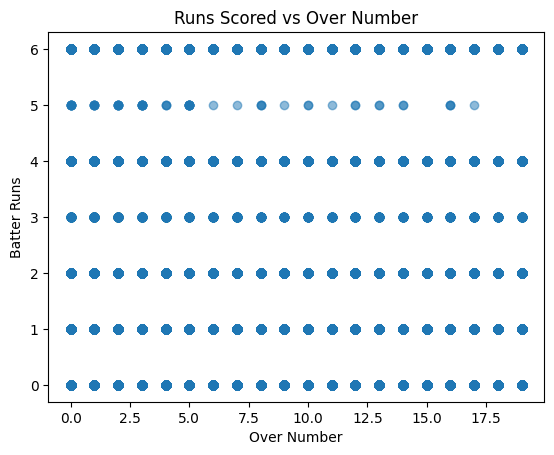

In [14]:
plt.scatter(data['over_number'], data['batter_runs'], alpha=0.5)
plt.title('Runs Scored vs Over Number')
plt.xlabel('Over Number')
plt.ylabel('Batter Runs')
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


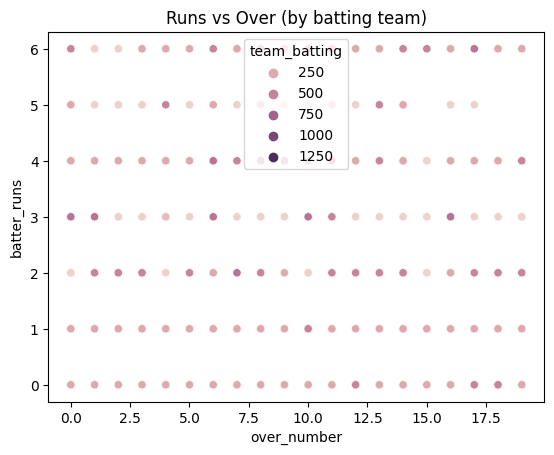

In [15]:
sns.scatterplot(x='over_number', y='batter_runs', data=data, hue='team_batting')
plt.title('Runs vs Over (by batting team)')
plt.show()

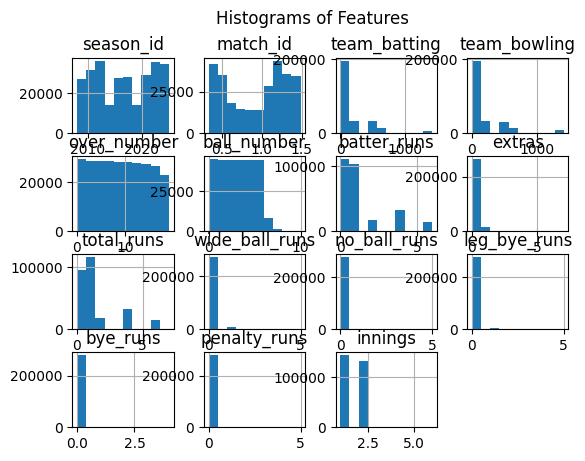

In [16]:

 data.hist()
 plt.suptitle('Histograms of Features')
 plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

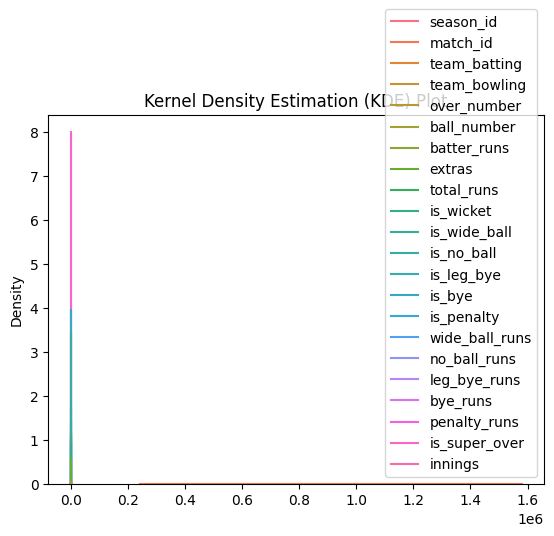

In [17]:
 sns.kdeplot(data=data)
 plt.title('Kernel Density Estimation (KDE) Plot')
 plt.show()

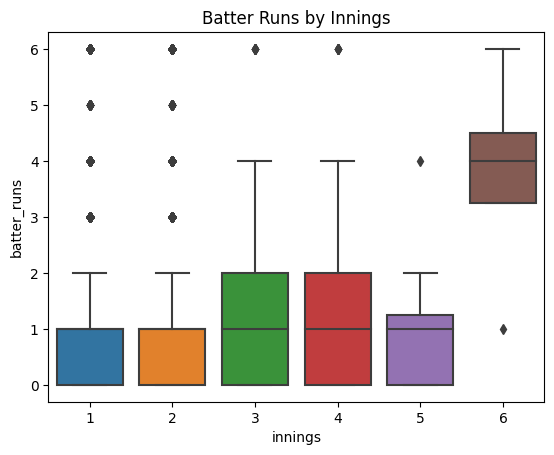

In [18]:
sns.boxplot(x='innings', y='batter_runs', data=data)
plt.title('Batter Runs by Innings')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


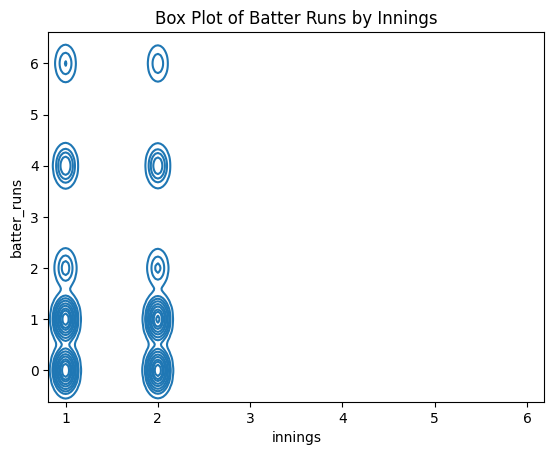

In [19]:
sns.kdeplot(x='innings', y='batter_runs', data=data)
plt.title('Box Plot of Batter Runs by Innings')
plt.show()

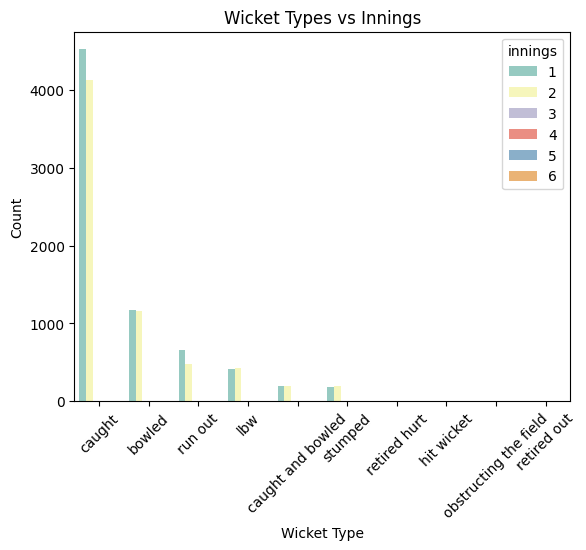

In [20]:
sns.countplot(
    data=data,
    x='wicket_kind',
    hue='innings',   # compare how many wickets in each innings
    palette="Set3"
)
plt.title('Wicket Types vs Innings')
plt.xlabel('Wicket Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # rotate if too long
plt.show()

# Label Encoding

In [22]:
from sklearn.preprocessing import LabelEncoder

cat_cols = data.select_dtypes(include=['object']).columns
le = LabelEncoder()

for col in cat_cols:
    data[col] = le.fit_transform(data[col])


# handling the missing values

In [23]:
data.fillna(data.mean(),inplace=True)
print(data)

        season_id  match_id  batter  bowler  non_striker  team_batting  \
0            2008    335982     560     345          105             6   
1            2008    335982     104     345          552             6   
2            2008    335982     104     345          552             6   
3            2008    335982     104     345          552             6   
4            2008    335982     104     345          552             6   
...           ...       ...     ...     ...          ...           ...   
278200       2025   1485779     632      63          594           252   
278201       2025   1485779     602     301          623           252   
278202       2025   1485779     602     301          623           252   
278203       2025   1485779     632     301          594           252   
278204       2025   1485779     602     301          623           252   

        team_bowling  over_number  ball_number  batter_runs  ...  is_bye  \
0                  1            0  

In [25]:
data.isnull().sum()

season_id            0
match_id             0
batter               0
bowler               0
non_striker          0
team_batting         0
team_bowling         0
over_number          0
ball_number          0
batter_runs          0
extras               0
total_runs           0
batsman_type         0
bowler_type          0
player_out           0
fielders_involved    0
is_wicket            0
is_wide_ball         0
is_no_ball           0
is_leg_bye           0
is_bye               0
is_penalty           0
wide_ball_runs       0
no_ball_runs         0
leg_bye_runs         0
bye_runs             0
penalty_runs         0
wicket_kind          0
is_super_over        0
innings              0
dtype: int64

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278205 entries, 0 to 278204
Data columns (total 30 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   season_id          278205 non-null  int64
 1   match_id           278205 non-null  int64
 2   batter             278205 non-null  int64
 3   bowler             278205 non-null  int64
 4   non_striker        278205 non-null  int64
 5   team_batting       278205 non-null  int64
 6   team_bowling       278205 non-null  int64
 7   over_number        278205 non-null  int64
 8   ball_number        278205 non-null  int64
 9   batter_runs        278205 non-null  int64
 10  extras             278205 non-null  int64
 11  total_runs         278205 non-null  int64
 12  batsman_type       278205 non-null  int64
 13  bowler_type        278205 non-null  int64
 14  player_out         278205 non-null  int64
 15  fielders_involved  278205 non-null  int64
 16  is_wicket          278205 non-null  bo

# converting the bool to int type

In [27]:
data = data.replace({True: 1, False: 0})


/tmp/ipykernel_224/3596977199.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({True: 1, False: 0})


In [28]:
data.isnull().sum()

season_id            0
match_id             0
batter               0
bowler               0
non_striker          0
team_batting         0
team_bowling         0
over_number          0
ball_number          0
batter_runs          0
extras               0
total_runs           0
batsman_type         0
bowler_type          0
player_out           0
fielders_involved    0
is_wicket            0
is_wide_ball         0
is_no_ball           0
is_leg_bye           0
is_bye               0
is_penalty           0
wide_ball_runs       0
no_ball_runs         0
leg_bye_runs         0
bye_runs             0
penalty_runs         0
wicket_kind          0
is_super_over        0
innings              0
dtype: int64

# all the columns to the integer type# 

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278205 entries, 0 to 278204
Data columns (total 30 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   season_id          278205 non-null  int64
 1   match_id           278205 non-null  int64
 2   batter             278205 non-null  int64
 3   bowler             278205 non-null  int64
 4   non_striker        278205 non-null  int64
 5   team_batting       278205 non-null  int64
 6   team_bowling       278205 non-null  int64
 7   over_number        278205 non-null  int64
 8   ball_number        278205 non-null  int64
 9   batter_runs        278205 non-null  int64
 10  extras             278205 non-null  int64
 11  total_runs         278205 non-null  int64
 12  batsman_type       278205 non-null  int64
 13  bowler_type        278205 non-null  int64
 14  player_out         278205 non-null  int64
 15  fielders_involved  278205 non-null  int64
 16  is_wicket          278205 non-null  in

# Heat Map

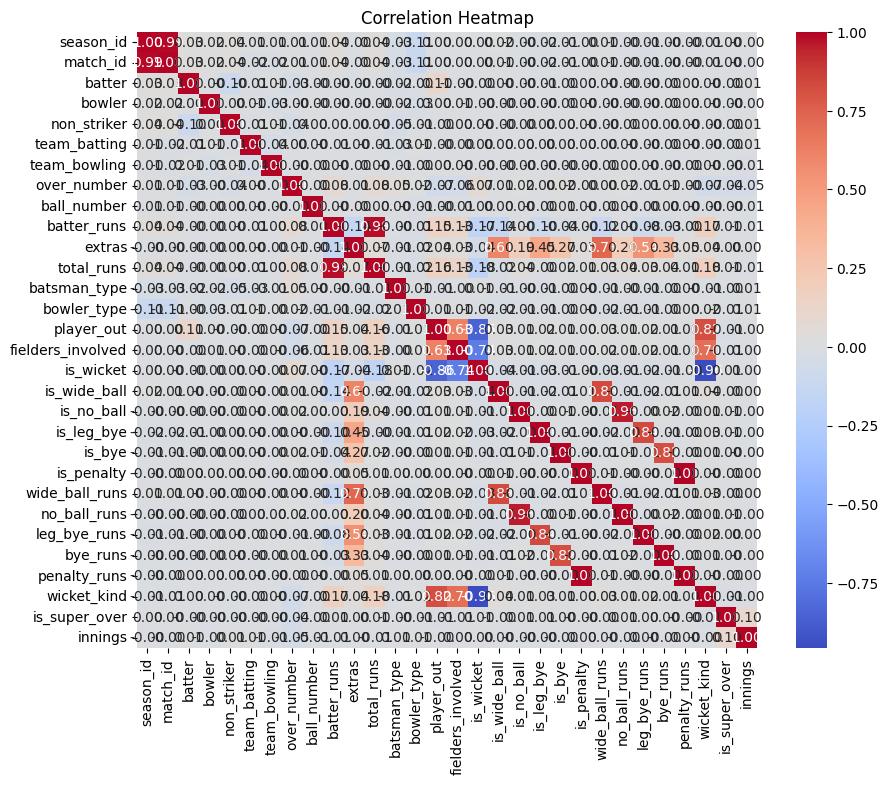

In [30]:
# One-hot encode categorical variables
data_encoded = pd.get_dummies(data)
# Correlation matrix
correlation_matrix = data_encoded.corr()
# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()